# Random Forest algorithm 
--- 

Random forest is a supercised learning algorithm. 

It has two variations:

- classification problem 
- regression problems
    
In our case, this algorithm can be used to rank the importance of variables in a regression of classification problem. With this we can detemine which anime is success.


## Import Libraries
---
Bottom are the essential libraries for random forest classification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
animelist_df = pd.read_csv('DataSets/Cleaned data/tv_only_success_metric.csv')
animelist_df.shape


(3310, 68)

In [3]:
animelist_df.head()

,title,source,episodes,rating,rank,studio,year,start_season,days_aired,duration_minutes,...,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story,success
0,Inu x Boku SS,Manga,12,PG-13 - Teens 13 or older,1274.0,SmallStudio,2012,Winter,78,24.0,...,0,0,0,0,0,0,0,0,0,1
1,Seto no Hanayome,Manga,26,PG-13 - Teens 13 or older,727.0,Gonzo,2007,Spring,183,24.0,...,1,0,0,0,0,0,0,0,0,1
2,Shugo Chara!! Doki,Manga,51,PG - Children,1508.0,Satelight,2008,Fall,357,24.0,...,0,1,0,0,0,0,0,0,0,1
3,Princess Tutu,Original,38,PG-13 - Teens 13 or older,307.0,SmallStudio,2002,Summer,281,16.0,...,0,0,1,0,0,0,0,0,0,1
4,Bakuman. 3rd Season,Manga,25,PG-13 - Teens 13 or older,50.0,J.C.Staff,2012,Fall,176,24.0,...,0,2,0,1,0,0,0,0,0,1


In [4]:
animelist_df = animelist_df.drop(columns = ['rank'])
animelist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        3310 non-null   object 
 1   source                       3310 non-null   object 
 2   episodes                     3310 non-null   int64  
 3   rating                       3310 non-null   object 
 4   studio                       3310 non-null   object 
 5   year                         3310 non-null   int64  
 6   start_season                 3310 non-null   object 
 7   days_aired                   3310 non-null   int64  
 8   duration_minutes             3310 non-null   float64
 9   Genre_Action                 3310 non-null   int64  
 10  Genre_Adventure              3310 non-null   int64  
 11  Genre_Cars                   3310 non-null   int64  
 12  Genre_Comedy                 3310 non-null   int64  
 13  Genre_Dementia    

## Frequency distribution of values in variables
---

    Check the frequency counts of categorical variables

In [5]:
# Initialize an empty list to store the names of object columns
object_columns = []

# Iterate through each column
for col in animelist_df.columns:
    if col == 'title': continue
    # Check if the column is of type 'object'
    if animelist_df[col].dtype == 'object':
         # Print the column name and its unique values
        print(col)
        print(animelist_df[col].unique())
        print()
        # Save the column name to the list of object columns
        object_columns.append(col)

source
['Manga' 'Original' 'Light novel' '4-koma manga' 'Novel' 'Visual novel'
 'Unknown' 'Other' 'Card game' 'Web manga' 'Game' 'Book' 'Music'
 'Picture book' 'Radio' 'Digital manga']

rating
['PG-13 - Teens 13 or older' 'PG - Children' 'G - All Ages'
 'R+ - Mild Nudity' 'R - 17+ (violence & profanity)']

studio
['SmallStudio' 'Gonzo' 'Satelight' 'J.C.Staff' 'Production Reed' 'Bones'
 'Studio Deen' 'Brain&#039;s Base' 'Studio Pierrot' 'Madhouse'
 'Production I.G' 'TMS Entertainment' 'Tatsunoko Production'
 'Toei Animation' 'Sunrise' 'Zexcs' 'unknown' 'Xebec' 'Kyoto Animation'
 'Shaft' 'Shin-Ei Animation' 'A-1 Pictures' 'Nippon Animation' 'Diomedea'
 'feel.' 'Seven' 'Doga Kobo' 'Lerche' 'ufotable' 'Silver Link.' 'Arms'
 'AIC' 'Studio Hibari' 'OLM' 'DLE' 'Studio Gallop' 'P.A. Works' 'Gainax'
 'Kachidoki Studio' 'Studio 4°C']

start_season
['Winter' 'Spring' 'Fall' 'Summer' '0']



In [6]:
# count the genres in each category
col_genres = [col for col in animelist_df.columns if 'Genre_' in col]
for col in col_genres:
    print(animelist_df[col].value_counts())   
    print()

Genre_Action
0    2229
1    1081
Name: count, dtype: int64

Genre_Adventure
0    2477
1     833
Name: count, dtype: int64

Genre_Cars
0    3279
1      31
Name: count, dtype: int64

Genre_Comedy
0    1709
1    1601
Name: count, dtype: int64

Genre_Dementia
0    3296
1      14
Name: count, dtype: int64

Genre_Demons
0    3203
1     107
Name: count, dtype: int64

Genre_Drama
0    2585
1     725
Name: count, dtype: int64

Genre_Ecchi
0    3048
1     262
Name: count, dtype: int64

Genre_Fantasy
0    2567
1     743
Name: count, dtype: int64

Genre_Game
0    3188
1     122
Name: count, dtype: int64

Genre_Harem
0    3127
1     183
Name: count, dtype: int64

Genre_Hentai
0    3310
Name: count, dtype: int64

Genre_Historical
0    3061
1     249
Name: count, dtype: int64

Genre_Horror
0    3198
1     112
Name: count, dtype: int64

Genre_Josei
0    3268
1      42
Name: count, dtype: int64

Genre_Kids
0    3072
1     238
Name: count, dtype: int64

Genre_Magic
0    2954
1     356
Name: count, dtype

In [7]:
# count the related in each category
col_related = [col for col in animelist_df.columns if 'Related_' in col]
for col in col_related:
    print(animelist_df[col].value_counts())   
    print()
    

Related_Adaptation
1     1921
0     1205
2      154
3       16
4        5
5        5
6        2
9        1
17       1
Name: count, dtype: int64

Related_Sequel
0    2191
1    1060
2      53
3       3
4       2
5       1
Name: count, dtype: int64

Related_Side story
0     2556
1      578
2      112
3       32
4       10
5        6
7        4
6        3
8        2
11       2
9        1
25       1
15       1
35       1
52       1
Name: count, dtype: int64

Related_Alternative version
0    2933
1     273
2      66
3      16
4      10
5       7
6       3
7       2
Name: count, dtype: int64

Related_Prequel
0    2524
1     740
2      38
3       6
6       1
5       1
Name: count, dtype: int64

Related_Summary
0    3015
1     260
2      26
3       7
4       1
6       1
Name: count, dtype: int64

Related_Other
0     2847
1      361
2       62
3       23
5        6
6        5
10       2
7        2
12       1
4        1
Name: count, dtype: int64

Related_Spin-off
0     3119
1      134
2       26


## Explore "Success" Variable
---

In [8]:
animelist_df['success'].value_counts()

success
4    1128
5     993
1     633
3     376
2     180
Name: count, dtype: int64

In [9]:
X = animelist_df.drop(['success', 'title'], axis=1)

y = animelist_df['success']

In [10]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2482, 65), (828, 65), (2482,), (828,))

## Encoding categories - Convert type (Objects to Numerics)

In [11]:
X_train.head(3)

,source,episodes,rating,studio,year,start_season,days_aired,duration_minutes,Genre_Action,Genre_Adventure,...,Related_Side story,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story
227,Manga,13,PG-13 - Teens 13 or older,Production I.G,2008,Spring,85,24.0,0,0,...,0,0,1,0,0,0,0,0,0,0
365,Unknown,13,R+ - Mild Nudity,OLM,2004,Spring,84,25.0,0,0,...,0,0,1,0,0,0,0,0,0,0
867,Manga,12,PG-13 - Teens 13 or older,SmallStudio,2015,Fall,78,23.0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [12]:
printlist = pd.DataFrame(animelist_df[object_columns])
printlist.head(3)


,source,rating,studio,start_season
0,Manga,PG-13 - Teens 13 or older,SmallStudio,Winter
1,Manga,PG-13 - Teens 13 or older,Gonzo,Spring
2,Manga,PG - Children,Satelight,Fall


In [13]:
import category_encoders as ce

# Encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(object_columns)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train[object_columns].head(3)
#X_train

,source,rating,studio,start_season
227,1,1,1,1
365,2,2,2,1
867,1,1,3,2


## Regressor model
---
In this section, we will be trying 4 different regressors. Below are the reason why we choose and how is it suitable for our project.
- Decision Tree: Intuitive and simple but prone to overfitting.
- Random Forest: Robust and efficient, suitable for large dataset.
- Gradient Boosting: Highly accurate but computationaly expensive.
- Extra Trees: Fast and robust, suitable for noisy dataset.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [15]:
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
et = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [16]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
et.fit(X_train, y_train)

dt_preds = np.clip(dt.predict(X_test), 0, 10)
rf_preds = np.clip(rf.predict(X_test), 0, 10)
gb_preds = np.clip(gb.predict(X_test), 0, 10)
et_preds = np.clip(et.predict(X_test), 0, 10)

In [17]:
summary = pd.DataFrame(
    {
        'DT predictions' : dt_preds,
        'RF predictions': rf_preds, 
        'GB predictions': gb_preds,
        'ET predictions' : et_preds,
        'Ensemble of the four ' : (dt_preds + rf_preds + gb_preds + et_preds) / 4,
        'Real values' : y_test
    }
)
summary

,DT predictions,RF predictions,GB predictions,ET predictions,Ensemble of the four,Real values
52,5.0,4.48,4.389743,4.46,4.582436,5
680,5.0,4.11,3.624283,3.59,4.081071,3
1376,5.0,4.73,4.296179,4.59,4.654045,5
1237,5.0,4.23,4.306207,4.49,4.506552,1
203,2.0,3.68,3.558147,3.09,3.082037,4
...,...,...,...,...,...,...
2341,5.0,4.90,4.840242,4.92,4.915060,4
210,3.0,3.98,4.209479,3.80,3.747370,5
2309,1.0,1.06,1.348061,1.17,1.144515,1
3135,5.0,4.80,4.720554,4.88,4.850138,5


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
dt_mae = mean_absolute_error(y_test, dt_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
et_mae = mean_absolute_error(y_test, et_preds)

# Calculate Mean Square Error (MSE)
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
gb_mse = mean_squared_error(y_test, gb_preds)
et_mse = mean_squared_error(y_test, et_preds)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)
et_rmse = mean_squared_error(y_test, et_preds, squared=False)

# Calculate R-squared (R2) score
dt_r2 = r2_score(y_test, dt_preds)
rf_r2 = r2_score(y_test, rf_preds)
gb_r2 = r2_score(y_test, gb_preds)
et_r2 = r2_score(y_test, et_preds)

metrics = {
    "Decision Tree:":[dt_mae, dt_mse, dt_rmse, dt_r2],
    "Random Forest:" : [rf_mae, rf_mse, rf_rmse, rf_r2],
    "Gradient Boosting:" :[gb_mae, gb_mse, gb_rmse, gb_r2],
    "Extra Trees:":[et_mae, et_mse, et_rmse, et_r2]
    
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=["MAE", "MSE", "RMSE", "R2 Score"] )

metrics_df

,MAE,MSE,RMSE,R2 Score
Decision Tree:,0.950483,2.259662,1.503217,-0.086582
Random Forest:,0.856630,1.147543,1.071235,0.448192
Gradient Boosting:,0.887113,1.153108,1.073828,0.445516
Extra Trees:,0.865906,1.136784,1.066201,0.453365


---
**Observation**
Base on the table above, we can see that the single decision tree is not very ideal comparing with the other three models.

**Conclusion for Regressor section**
While regression model can technically be applied to categorical data, but the regresiion model will assume a linear relationship between the features and the target. 

For example: 
One hot encoding, which convert categorical variables into binary dummy variables, regression model still assume a linear relationship between each dummy variables and the target. This assuption may not be true, especially for complex or non-linear relationship.

In addtion, it increase the risk of overfitting and make it a less appropriate or effective approach.

## **Random Forest Classifier model** with default parameters
---



In [19]:
def model_accuracy(rfc, X_train, X_test,y_train, y_test):
    # fit the model
    rfc.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = rfc.predict(X_train)

    # Predict on the test set
    y_test_pred = rfc.predict(X_test)

    # check accuracy
    from sklearn.metrics import accuracy_score
    # Calculate accuracy score for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate accuracy score for test set
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the accuracy scores
    print('Model accuracy score :')
    print()
    print('Training accuracy: {0:0.2f}%'.format(train_accuracy*100))
    print('Test accuracy: {0:0.2f}%'.format(test_accuracy*100))
    
    return [y_train_pred,y_test_pred, train_accuracy, test_accuracy]

### 10 Decision Trees

In [20]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc1 = RandomForestClassifier(n_estimators=10,random_state=0)


print("10 decision-trees:")
accuracy = model_accuracy(rfc1, X_train, X_test,y_train, y_test)

10 decision-trees:
Model accuracy score :

Training accuracy: 98.83%
Test accuracy: 55.56%


### 100 Decision Trees

In [21]:
# instantiate the classifier with n_estimators = 100
rfc2 = RandomForestClassifier(n_estimators=100, random_state=0)

print("100 decision-trees:")
accuracy =model_accuracy(rfc2, X_train, X_test,y_train, y_test)

100 decision-trees:
Model accuracy score :

Training accuracy: 100.00%
Test accuracy: 61.84%


---
**Observation**

Base on what we see here, it show that 100 decision trees train and test accuracy is better than 10 decision trees. 
Therefore, we can say that increase the number of the trees will improve the prediction of the accuracy.

However, beyond a certain point, adding more trees the accuracy will remain the same as the model starts converge to its optimal performance.
In addition, with large numbers of trees, it becomes more challenging to interpret and understand the logic of the model.

### Tree Visualisation
---

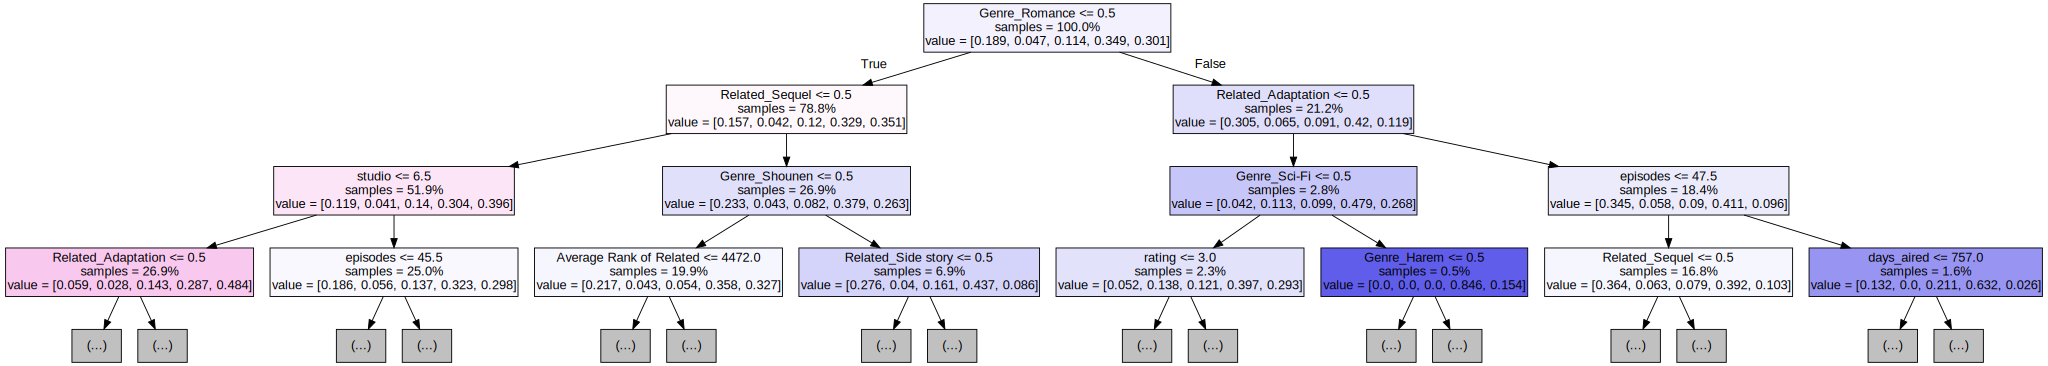

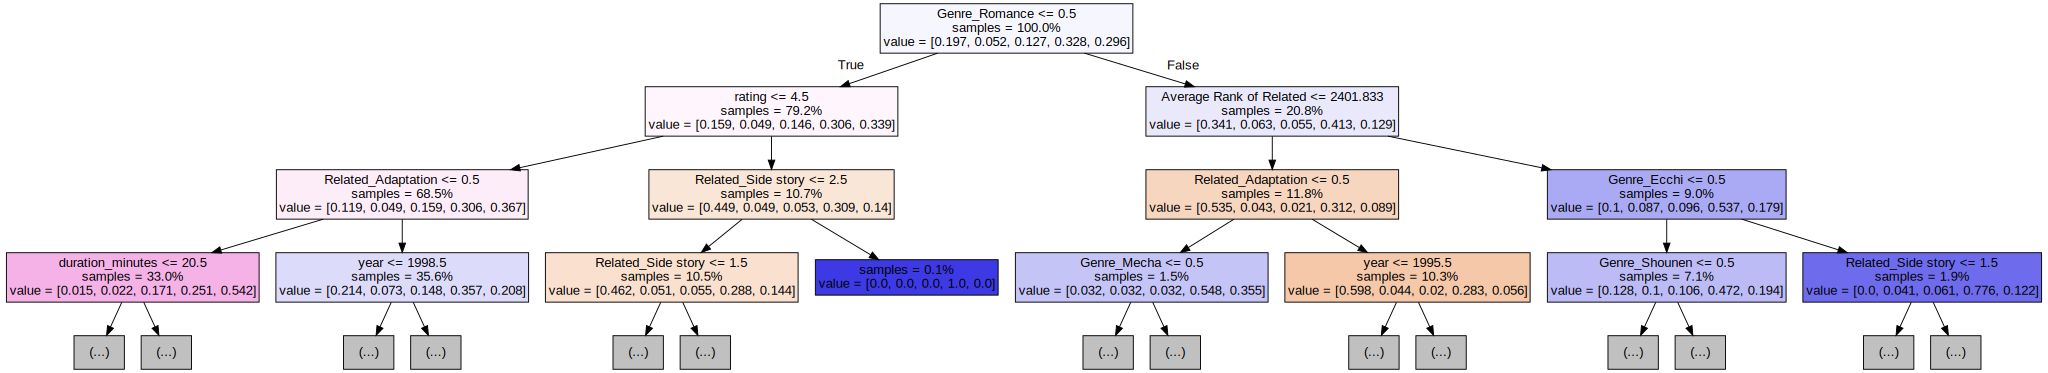

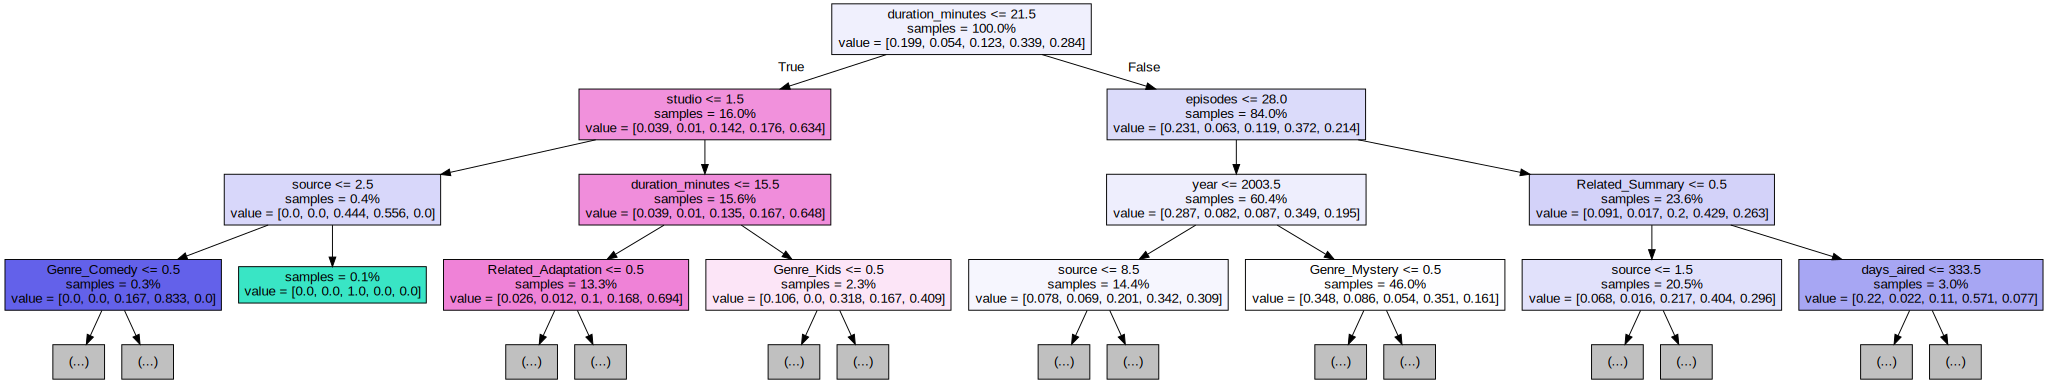

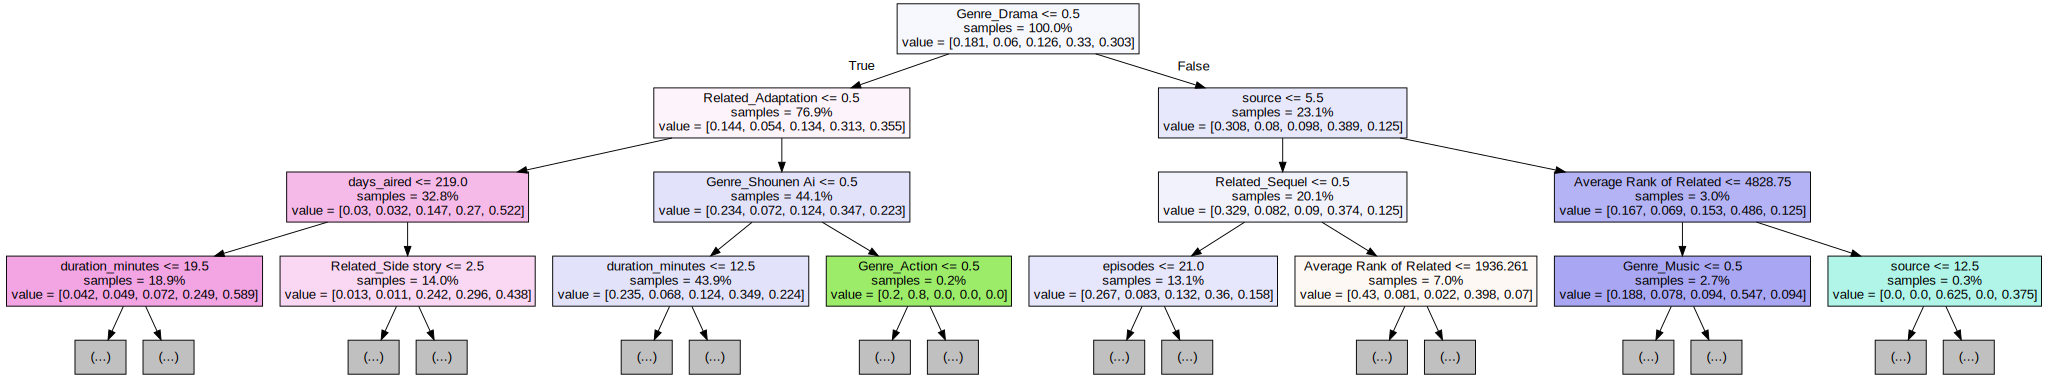

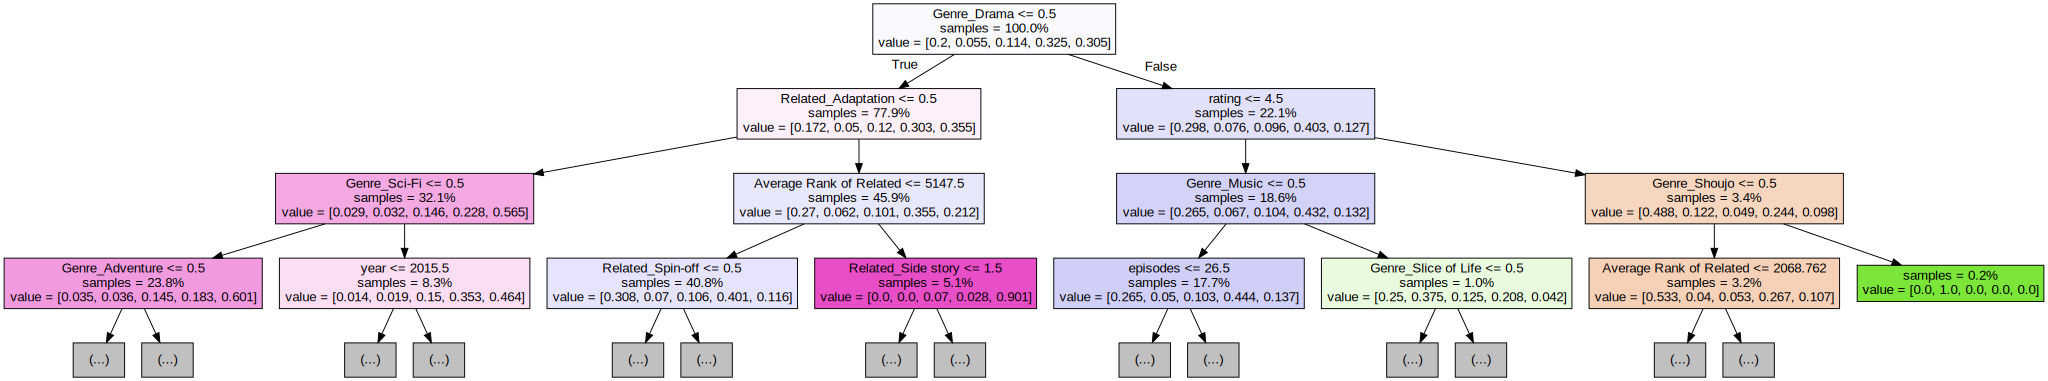

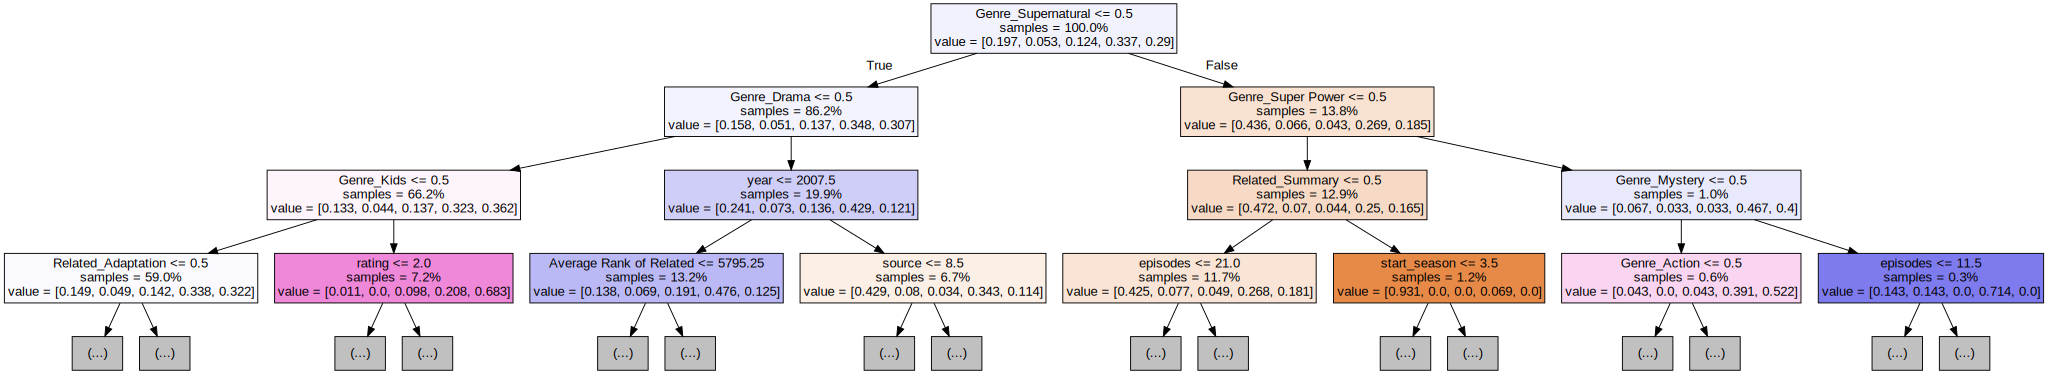

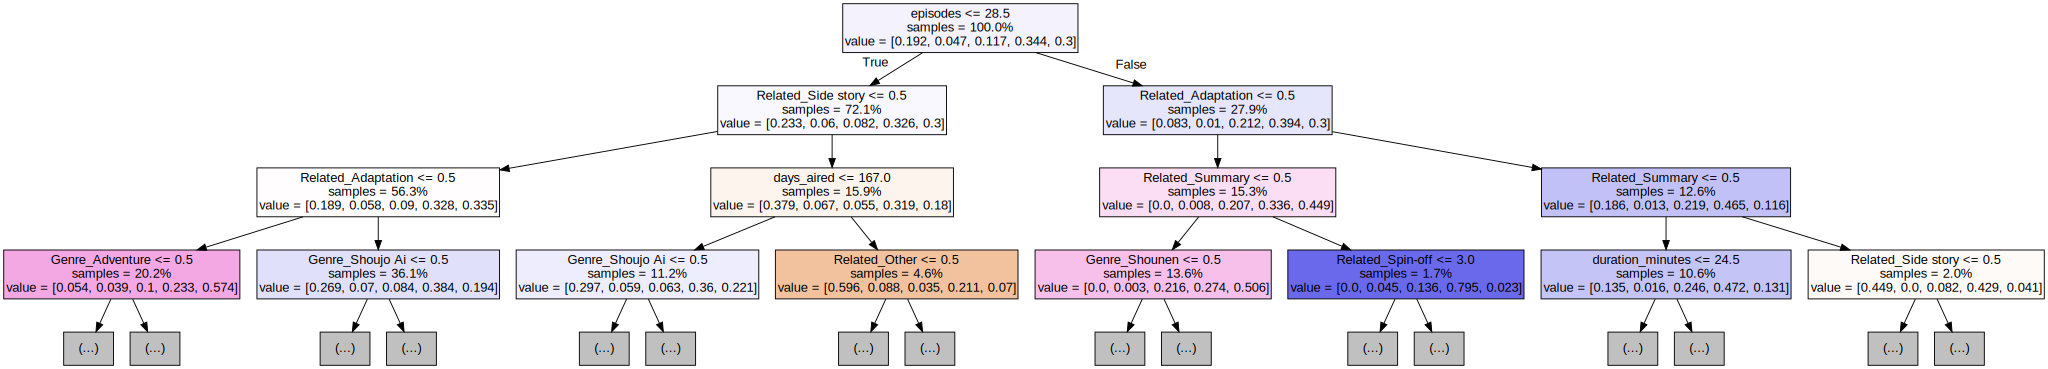

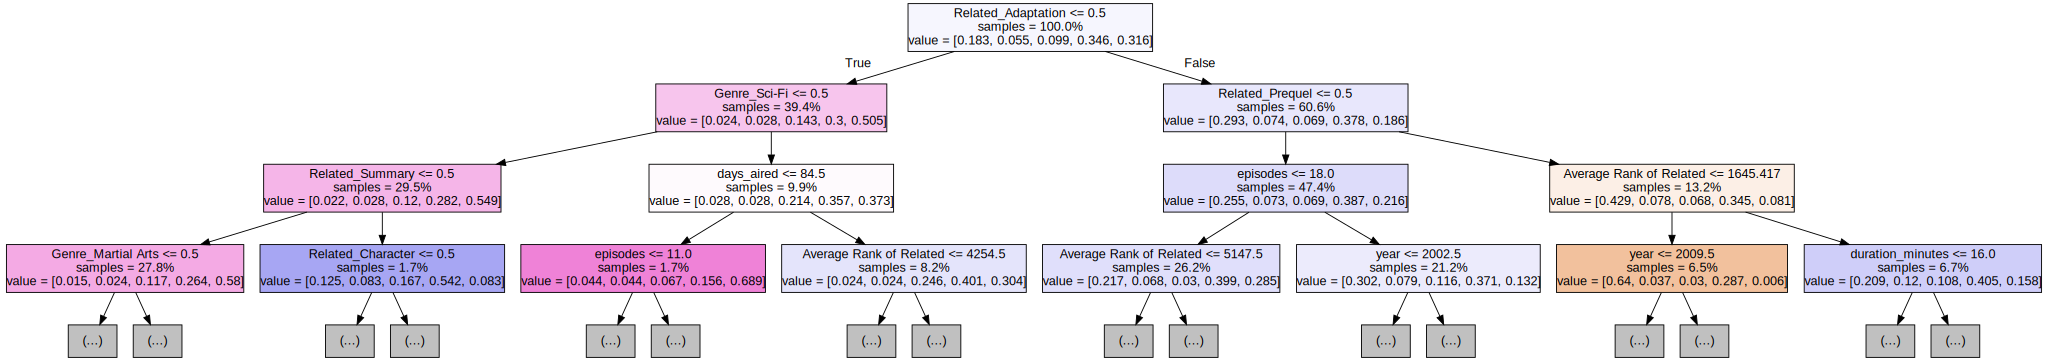

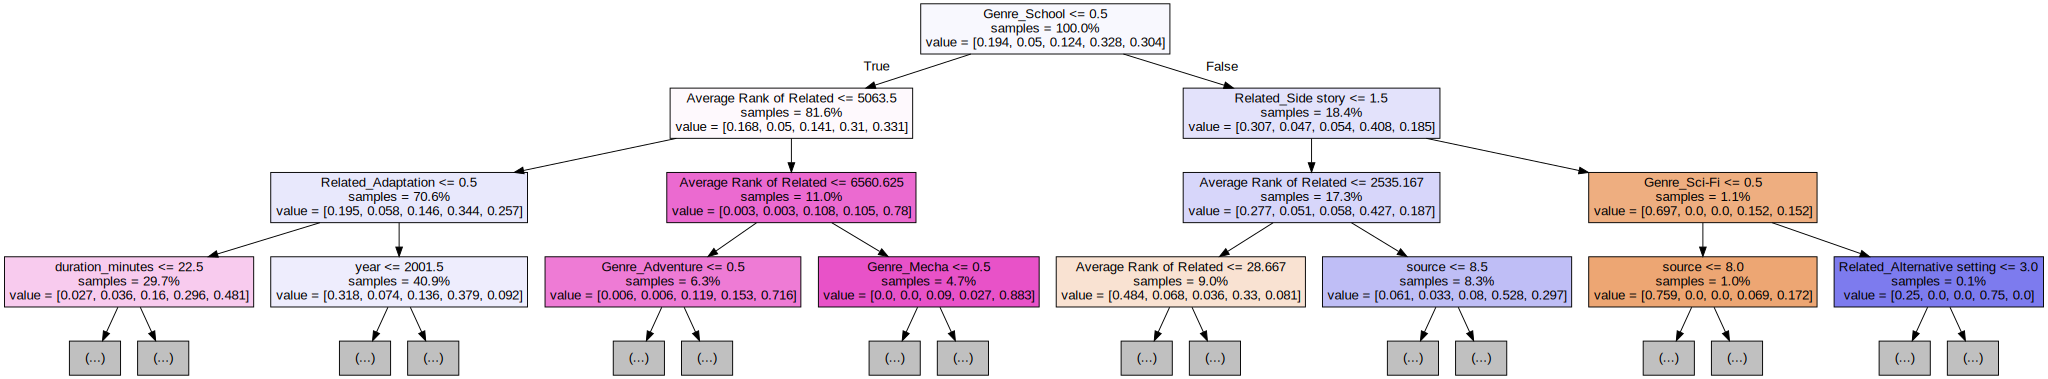

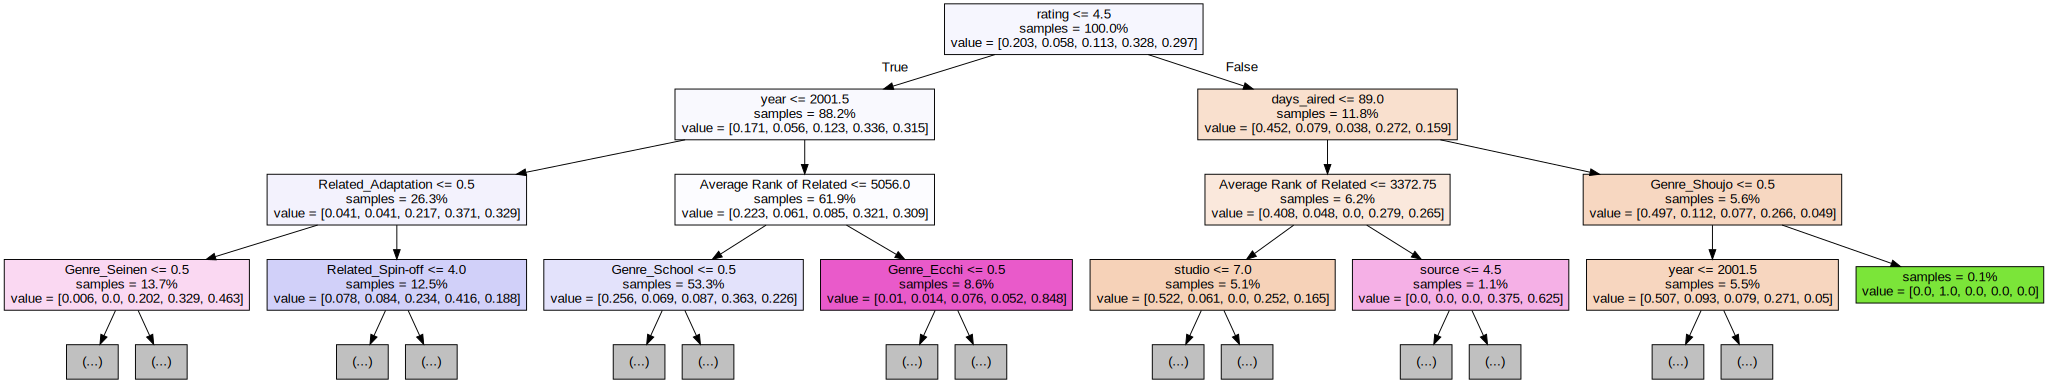

In [22]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(10):
    tree = rfc2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [23]:
# view the feature scores
feature_scores = pd.Series(rfc2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Average Rank of Related    0.145285
year                       0.076079
duration_minutes           0.064173
days_aired                 0.056810
studio                     0.056135
                             ...   
Related_Full story         0.000182
Genre_NA                   0.000009
Genre_Yuri                 0.000000
Genre_Yaoi                 0.000000
Genre_Hentai               0.000000
Length: 65, dtype: float64

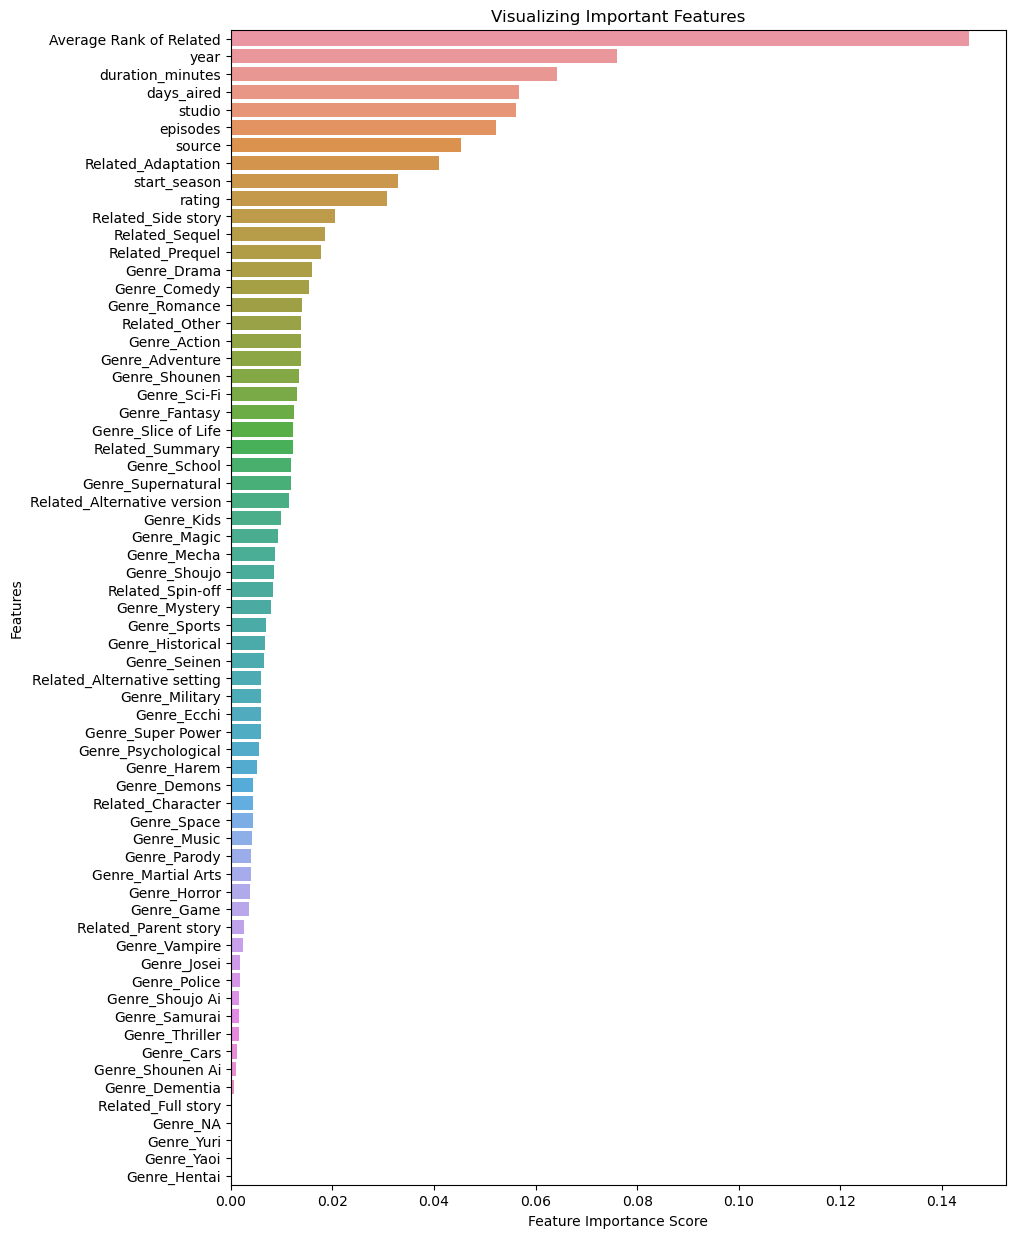

In [24]:
# Set the size of the figure
plt.figure(figsize=(10, 15))  # Adjust the width and height as needed

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

## **Random Forest Classifier Model** with top few features
---
Create a new random forest classification by using the **top fews features**.

In [25]:
top = pd.DataFrame(feature_scores.head(20))
top = top.transpose()

In [26]:
top.columns

Index(['Average Rank of Related', 'year', 'duration_minutes', 'days_aired',
       'studio', 'episodes', 'source', 'Related_Adaptation', 'start_season',
       'rating', 'Related_Side story', 'Related_Sequel', 'Related_Prequel',
       'Genre_Drama', 'Genre_Comedy', 'Genre_Romance', 'Related_Other',
       'Genre_Action', 'Genre_Adventure', 'Genre_Shounen'],
      dtype='object')

Take out popularity, title, scored_by because is not important 

In [27]:
# declare feature vector and target variable

X = animelist_df[top.columns]
y = animelist_df['success']

In [28]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [29]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(object_columns)


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,Average Rank of Related,year,duration_minutes,days_aired,studio,episodes,source,Related_Adaptation,start_season,rating,Related_Side story,Related_Sequel,Related_Prequel,Genre_Drama,Genre_Comedy,Genre_Romance,Related_Other,Genre_Action,Genre_Adventure,Genre_Shounen
227,432.0,2008,24.0,85,1,13,1,1,1,1,0,1,1,1,1,0,0,0,0,0
365,4370.0,2004,25.0,84,2,13,2,0,1,2,0,0,1,0,1,1,0,0,0,0
867,2742.4,2015,23.0,78,3,12,1,2,2,1,0,0,0,0,1,0,3,0,0,0
1258,4208.0,1977,25.0,197,4,28,1,1,2,1,0,0,0,0,0,0,0,1,0,1
276,2051.4,2005,24.0,183,5,24,1,1,3,1,1,1,0,0,1,1,0,0,0,0


In [30]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100,random_state=0)
model = model_accuracy(clf, X_train, X_test,y_train, y_test)
y_train_pred = model[0]
y_test_pred = model[1]

Model accuracy score :

Training accuracy: 100.00%
Test accuracy: 61.23%


### Tree Visualisation

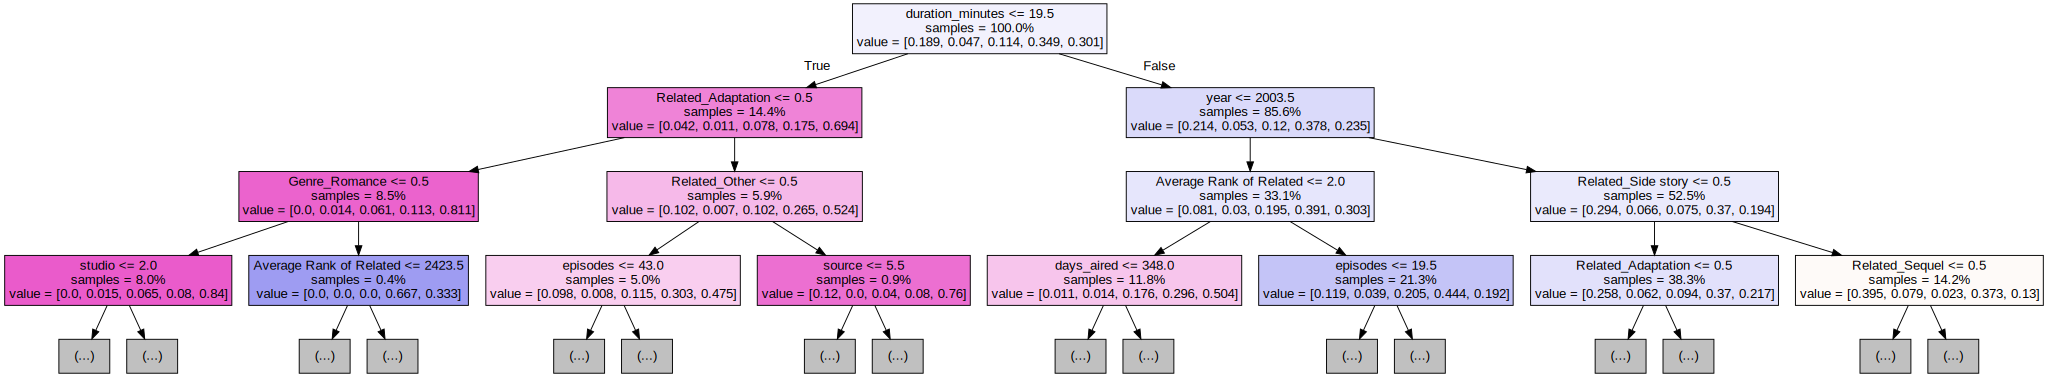

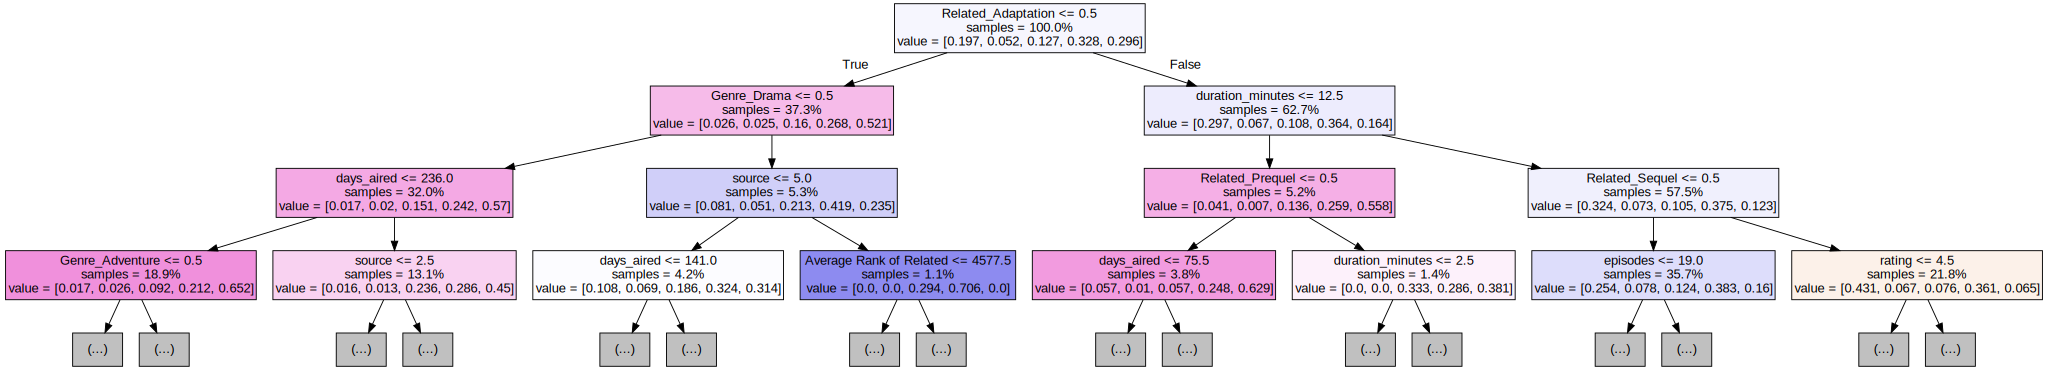

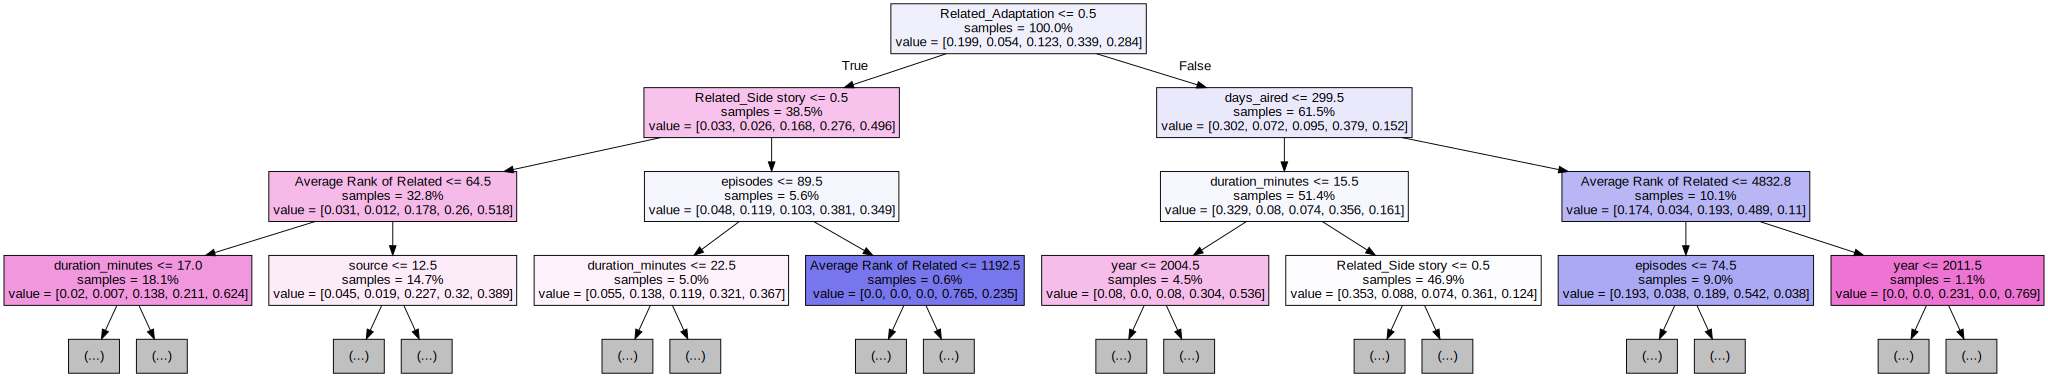

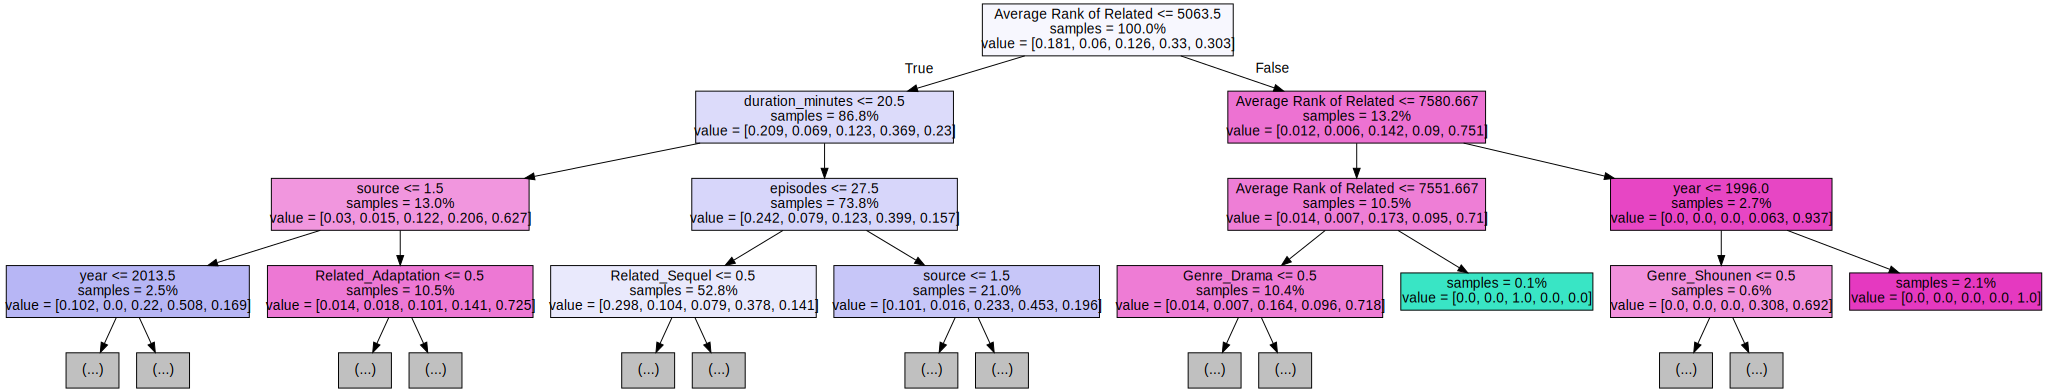

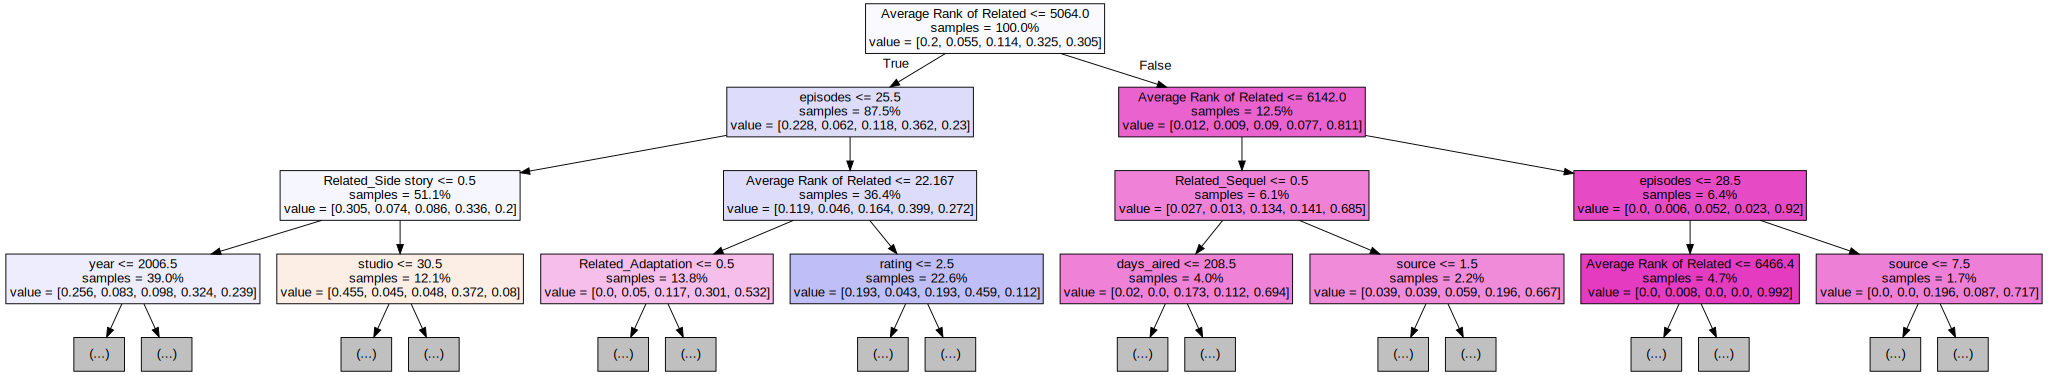

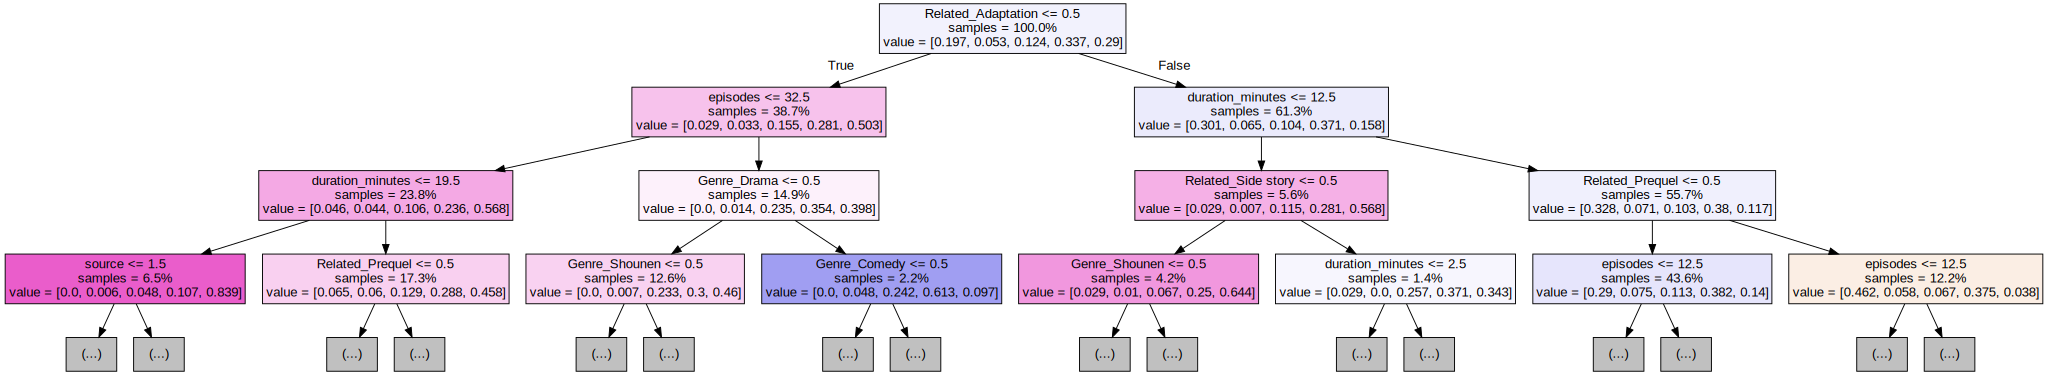

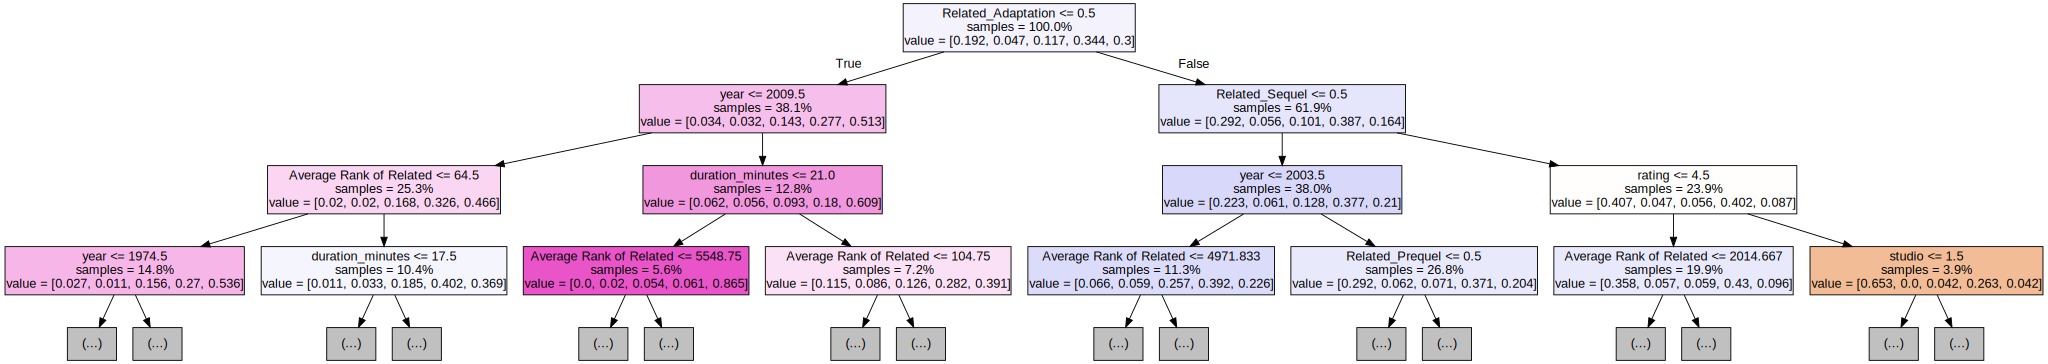

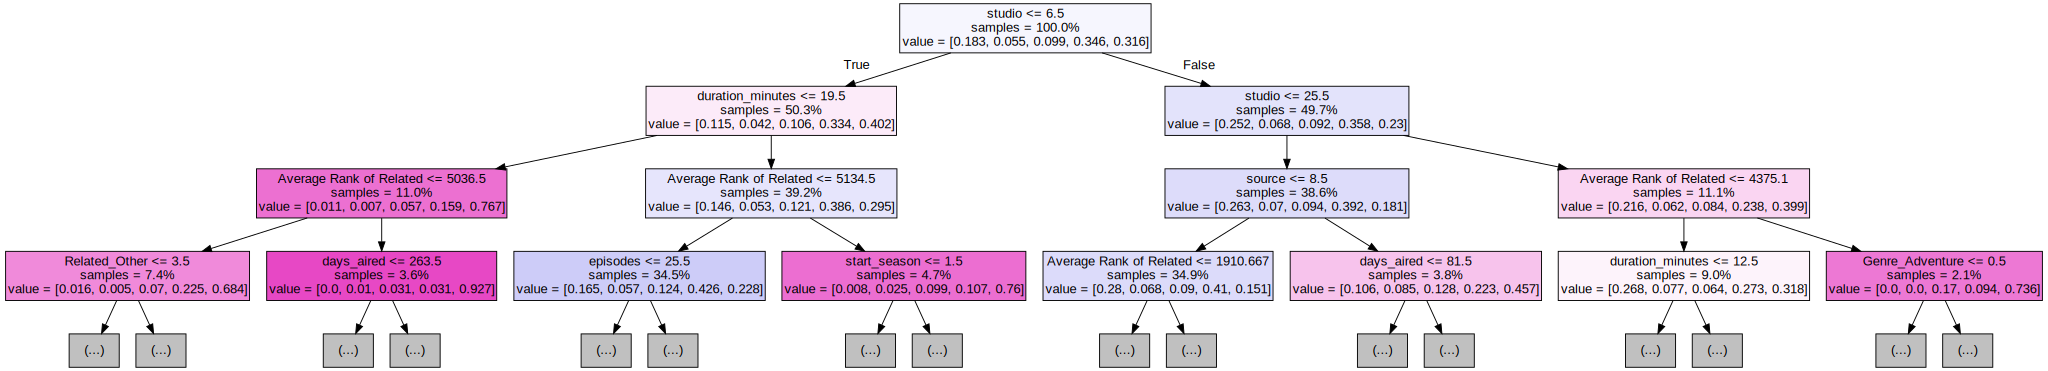

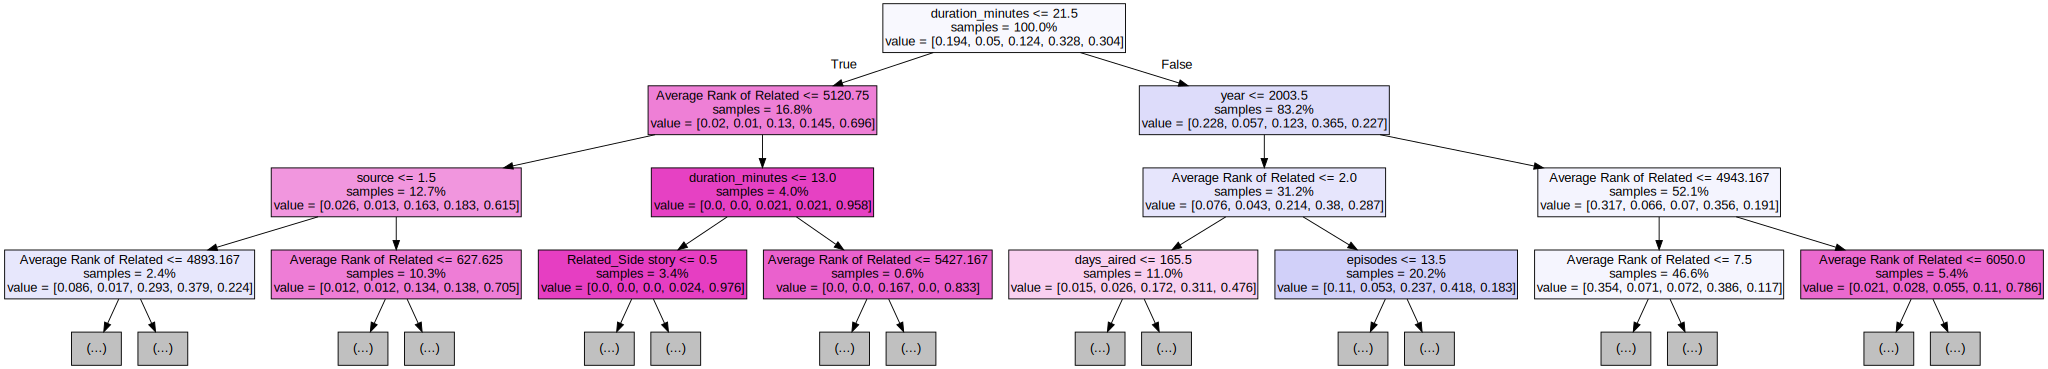

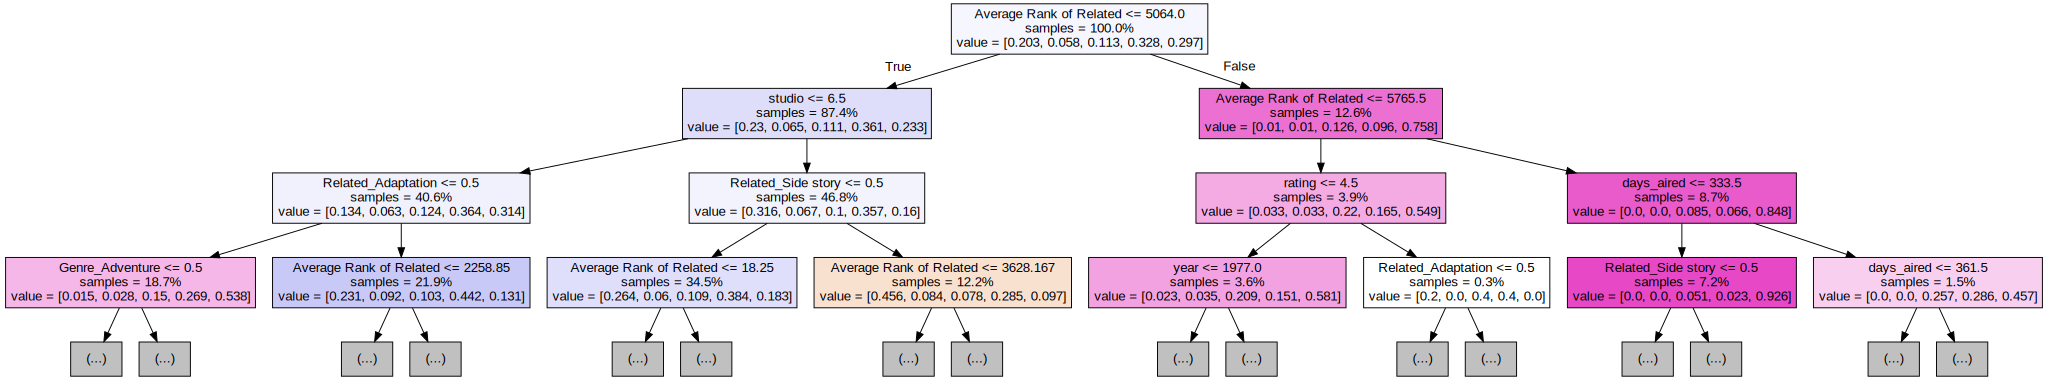

In [31]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(10):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [32]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Average Rank of Related    0.190181
year                       0.105986
duration_minutes           0.085328
days_aired                 0.077154
studio                     0.073941
episodes                   0.069710
source                     0.057573
Related_Adaptation         0.047496
start_season               0.045870
rating                     0.043377
Related_Side story         0.026424
Related_Sequel             0.023969
Related_Prequel            0.020976
Genre_Comedy               0.020965
Genre_Action               0.019746
Genre_Drama                0.019568
Genre_Romance              0.018473
Related_Other              0.018285
Genre_Adventure            0.017864
Genre_Shounen              0.017115
dtype: float64

---
**Finding from this Section**

Base on the accuracty rate, we can see there is a slight decreased. With that, we can say although the bottom features have low importance scores but they may still contribute to prediction of the successfulness of the anime series.

Random Forest Classification are robust to noise and irrelevant features due to thier nature. Hence, removing features may disrupt the balance within the group and leading to a decreased accuracy.

### Confusion matrix
---

In [33]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106   0   1  44   3]
 [ 11   2   1  29   3]
 [  1   0  17  33  29]
 [ 50   1   8 192  47]
 [  4   0   9  47 190]]


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.62      0.69      0.65       154
           2       0.67      0.04      0.08        46
           3       0.47      0.21      0.29        80
           4       0.56      0.64      0.60       298
           5       0.70      0.76      0.73       250

    accuracy                           0.61       828
   macro avg       0.60      0.47      0.47       828
weighted avg       0.61      0.61      0.59       828



In [35]:

def get_rates(cm, i, total):
    tp = cm[i][i]
    fp = 0
    for j in range(0,5):
        if (j==i): continue
        fp = fp + cm[j][i]
    fn = 0
    for k in range(0,5):
        if (k==i): continue
        fn = fn + cm[i][k]
    tn = total - tp-fn-fp
    
    return [tp,tn,fp,fn]

def get_TP_TN_rates(stat):
    TP = stat[0]
    TN = stat[1]
    FP = stat[2]
    FN = stat[3]
    
    # True Positive Rate and True Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    return [TPR,TNR]

def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    correct_pred = c_matrix[0][0]+ c_matrix[1][1]+ c_matrix[2][2]+ c_matrix[3][3]+ c_matrix[4][4]
    total = 0
    for i in range(0,5):
        for j in range(0,5):
            total+=c_matrix[i][j]
    wrong_pred = total - correct_pred
    
    print(f"Correct: {correct_pred}")
    print(f"Wrong: {wrong_pred}")

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model ({train_test_string} Dataset)")
    print("Classification Accuracy:", scores.mean())
    print()
    
    stats = []
    for i in range(0,5):
        stat = get_rates(c_matrix, i, total)
        stats.append(stat)
        print(f"--------------------For success = {i+1} :----------------------------")
        print(f"TP:{stat[0]}, TN:{stat[1]}, FP:{stat[2]}, FN:{stat[3]}")
        rates=get_TP_TN_rates(stat)
        precision = stat[0]/(stat[1]+stat[2])
        recall = stat[0]/(stat[1]+stat[3])
        f_score = (2 * ((precision * recall) /(precision + recall)))
        print("True Positive Rate:", rates[0])
        print("True Negative Rate:", rates[1])
        print("Precision:", round(precision*100,2))
        print("Recall:", round(recall*100,2))
        print("F1-score:",  round(f_score*100,2))
        print("Support:",  stat[0] + stat[3])
        print()

    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()


In [36]:
def model_performance(random_forest, X_train, X_test, y_train, y_test):
    # Import libraries
    from sklearn.model_selection import cross_val_predict
    from sklearn.model_selection import cross_val_score
    
    # K-Fold Cross Validation
    y_train_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)
    y_test_pred = cross_val_predict(random_forest, X_test, y_test, cv=5)
    
    train_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring = "accuracy")
    test_scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring = "accuracy")
    
    print("-> Train Dataset")
    confusion_matrix_TPR_TNR(y_train, y_train_pred, train_scores, "Train")

    print("\n\n-----\n-> Test Dataset")
    confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")

-> Train Dataset
Correct: 1487
Wrong: 995
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.5991091711559682

--------------------For success = 1 :----------------------------
TP:320, TN:1850, FP:153, FN:159
True Positive Rate: 0.6680584551148225
True Negative Rate: 0.9236145781328008
Precision: 15.98
Recall: 15.93
F1-score: 15.95
Support: 479

--------------------For success = 2 :----------------------------
TP:2, TN:2340, FP:8, FN:132
True Positive Rate: 0.014925373134328358
True Negative Rate: 0.9965928449744463
Precision: 0.09
Recall: 0.08
F1-score: 0.08
Support: 134

--------------------For success = 3 :----------------------------
TP:39, TN:2124, FP:62, FN:257
True Positive Rate: 0.13175675675675674
True Negative Rate: 0.9716376944190301
Precision: 1.78
Recall: 1.64
F1-score: 1.71
Support: 296

--------------------For success = 4 :----------------------------
TP:552, TN:1140, FP:512, FN:278
True Positive Rate: 0.6650602409638554
True Negative Rate: 0.69007263922

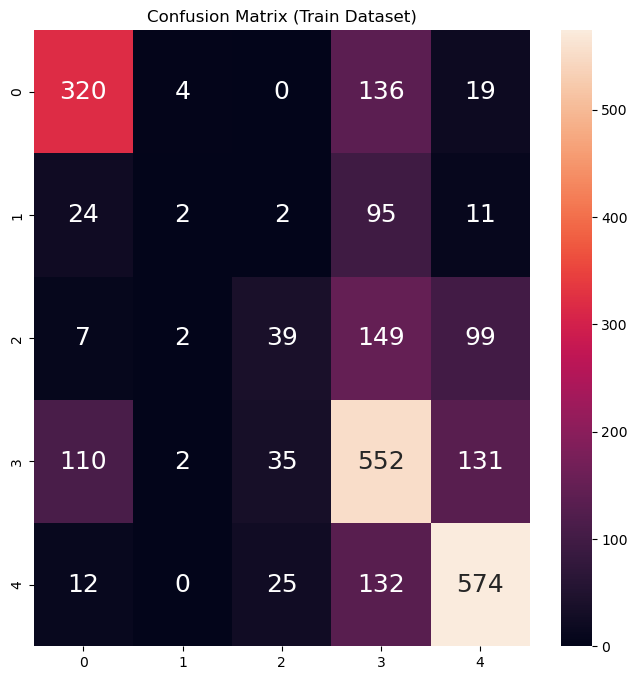

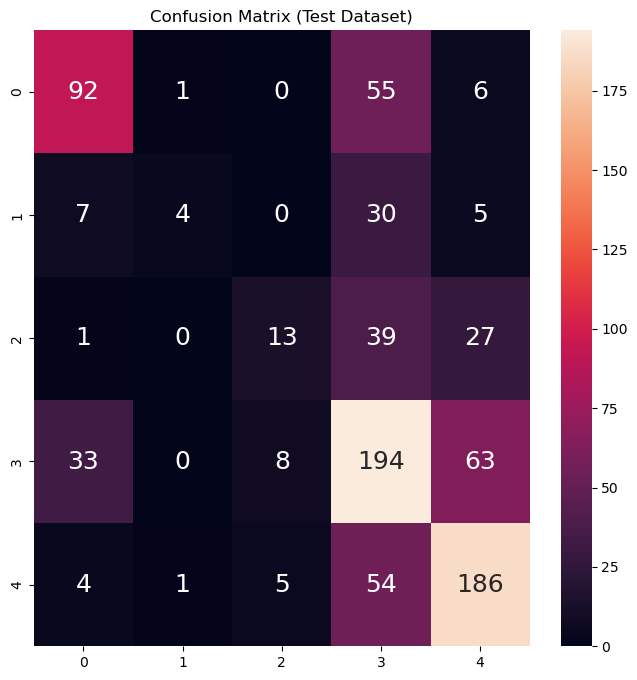

In [37]:
model_performance(clf,  X_train, X_test, y_train, y_test)

**Classification Report**

Precisiona and recall are two important metrics used to evaluate the performance for classification model.
- **Precision** : measure the accuracy of the positive prrediction. 
- **Recall** : measure the ability of the model to find all the positive instance. "Out of all the actual positive, how many correctly predicted?"
- **F1-Score** : is the harmonic mean of precision and recall and provides a single score that balance both metrics.
- **Support** : refer to the number of actual instance of each class in the dataset.

With that we can calculate the overall accuracy of this model.

**Comparison of Train and Test Dataset**

The model exhibits consistent performance between the training and test dataset, suggesting good generalisation ability. 
However, there are still room for improvement in identifying level of success (especiallly success level 2) 

**Conclusion for Random Forest Classifier Model**

In conclusion, we created a random forest classifier model to provide valuable insights into the factors influencing the successfulness of the anime TV series. While achieving a prediction accuracy of 59.06%, our model underscores the importance of continually refining feature selection to better capture the overview dynamics.